In [27]:
#imports necessary libraries and reads in Data
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/My Account/Desktop/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
#I generated a column for Total Score (feature Engineering, if you like)
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [29]:
#Tells you the columns in the dataset. I often use it to confirm how the columns are spelt or wrtitten 
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score'],
      dtype='object')


In [30]:
#Test 1 Descriptive statistics: This summarize and describe the main features of a dataset 
#Describe the statistics of the numerical values in the dataset
df.describe()

,math score,reading score,writing score,total score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [31]:
#Alternatively, to describe the main features of a specific column say Math Score, we can use 

math = df['math score']

print("Mean:", math.mean())
print("Median:", math.median())
print("Mode:", math.mode().values)
print("Standard Deviation:", math.std())
print("Variance:", math.var())
print("Min:", math.min())
print("Max:", math.max())
print("Range:", math.max() - math.min())


Mean: 66.089
Median: 66.0
Mode: [65]
Standard Deviation: 15.163080096009468
Variance: 229.91899799799847
Min: 0
Max: 100
Range: 100


In [32]:
#Test2 :Skewness 
#Skewness tells a data analyst if the data is symmetric or Asymmetric.
#Understanding skewness helps choose the right:
#Descriptive stats
#Visualizations (e.g., histograms, boxplots)
#Modeling techniques (e.g., transformations)

#Let's check the skewness of the numeric values in the dataset
# Step 1: Select numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Calculate skewness and interpret
print("Skewness Analysis:\n")

for col in numeric_cols.columns:
    value = skew(df[col], nan_policy='omit')  # handles NaNs
    interpretation = (
        "Symmetric" if abs(value) < 0.5 else
        "Moderately Skewed" if abs(value) < 1 else
        "Highly Skewed"
    )
    direction = (
        " (Right/Positive)" if value > 0 else
        " (Left/Negative)" if value < 0 else ""
    )
    print(f"{col}: Skewness = {value:.3f} → {interpretation}{direction}")

Skewness Analysis:

math score: Skewness = -0.279 → Symmetric (Left/Negative)
reading score: Skewness = -0.259 → Symmetric (Left/Negative)
writing score: Skewness = -0.289 → Symmetric (Left/Negative)
total score: Skewness = -0.299 → Symmetric (Left/Negative)


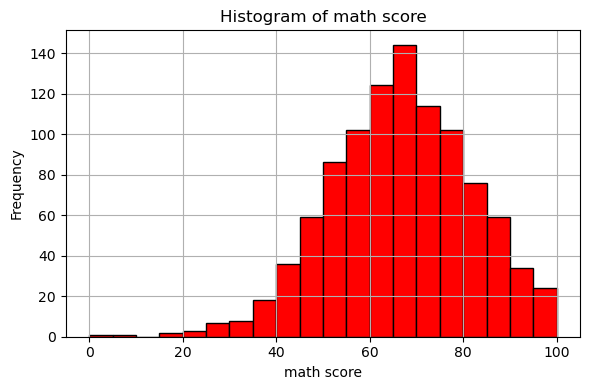

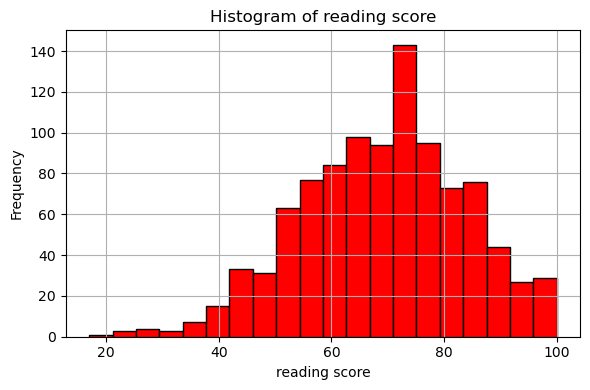

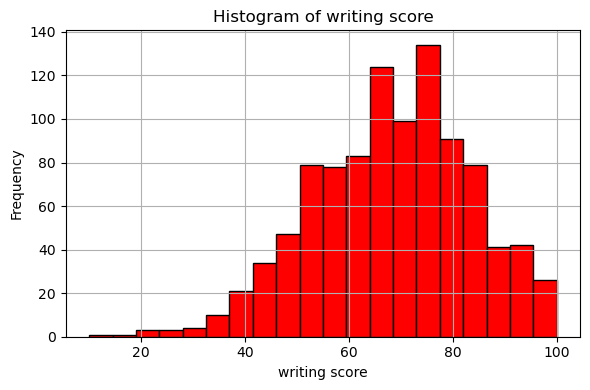

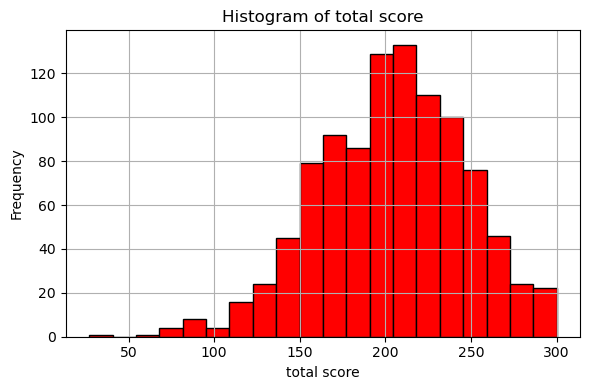

In [33]:
#Test 3: Boxplots/Histograms to visualize the score distributions and check for the numerical values:
#Spread (variance), Symmetry vs skewness and Outliers (extremely high or low scores)

score_cols = ['math score', 'reading score', 'writing score', 'total score']

for col in score_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=20, color='red', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Overall Insights for the Data Analyst:
s/N    Score Type	              Symmetry/Skewness            	               Insights
1.     Math	                      Symmetric	Normal distribution,               centered around 65
2.     Reading	                  Symmetric	Consistent high performance        peak ~70–75
3.     Writing	                  Slightly left-skewed	                       Some students struggle more here
4.     Total	                  Slightly left-skewed	                       Mostly well-balanced, a few low scorers

These distributions are ideal for statistical testing and modeling, since they’re mostly normal. 
The slight skewness in writing scores may need attention depending on your next step (e.g., regression or hypothesis testing).

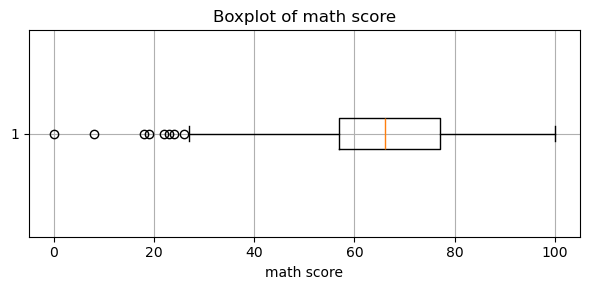

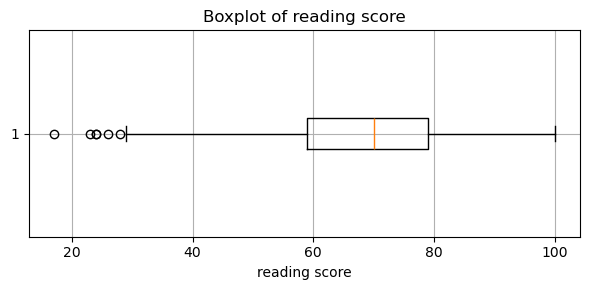

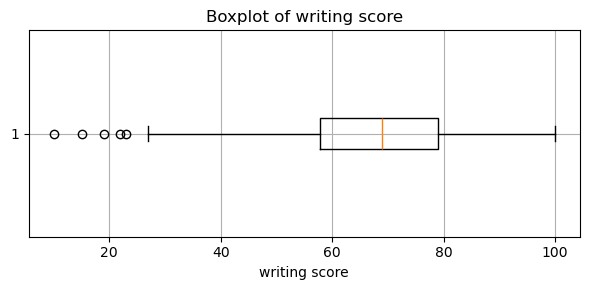

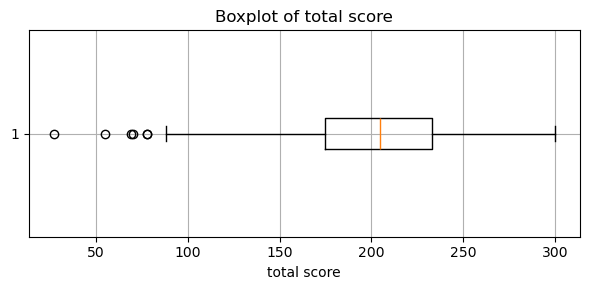

In [35]:
#Test 4: Boxplots – Shows the spread of data and detects outliers

for col in score_cols:
    plt.figure(figsize=(6, 3))
    plt.boxplot(df[col], vert = False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

How to Read a Boxplot 
Middle line = Median (Q2), 
Box = Interquartile range (IQR, from Q1 to Q3)
Whiskers = Approx. min and max values (within 1.5×IQR)
Dots outside whiskers = Outliers

s/N    Score Type	        Skew/Spread	Outliers?           	Key Insight
1.     Math	                Right/ Yes                          several very low performers
2.    Reading               Symmetric/Few	                    High consistency,fewer struggling students
3.    Writing	            Left/ Yes	                        More low-end outliers
4.    Total	                Mostly symmetric/Yes	            A few students significantly underperformed



In [38]:
#Test 5: T Score – used when you want to compare the means of two groups. 
#It is commonly used when the sample size is large (n < 30), and the population standard deviation (σ) is not known 
#Compare average exam scores between two groups, such as: Male vs Female
#Interpretation Guide:
# p < 0.05: Statistically significant difference 
#p ≥ 0.05: No significant difference 
#T-statistic: Direction and size of the difference

#import library
from scipy.stats import ttest_ind

# Separate groups
male_math = df[df['gender'] == 'male']['math score']
female_math = df[df['gender'] == 'female']['math score']

# Perform t-test
t_stat, p_val = ttest_ind(male_math, female_math)

# Display results
print("T-Test for Math Score: Male vs Female")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Interpretation
if p_val < 0.05:
    print("Interpretation:Statistically significant difference in math scores between genders.")
else:
    print("Interpretation: No statistically significant difference in math scores between genders.")

T-Test for Math Score: Male vs Female
T-statistic: 5.3832
P-value: 0.0000
Interpretation:Statistically significant difference in math scores between genders.


When we compared the math scores of male and female students, we found that the difference in their average scores is statistically significant, it
is not just due to random chance — it's real and meaningful. In simpler terms: Gender has a measurable impact on math performance in this dataset.
Use case for T-Test: if you’re testing whether a new drug leads to better recovery rates than an existing one, you would use a T-test to compare the means of recovery times between the two groups

In [41]:
#Test 6: Z-Test: A Z-test is used to determine whether a sample mean significantly differs from a known population mean, or
#another sample mean. It is commonly used when the sample size is large (n > 30), and the population standard deviation (σ) is known 

#Using the Math Score, we can check if students in this dataset score significantly different in math from a national average of 70?


from scipy import stats  # imports libray

pop_mean = 70

# Sample data
sample = df['math score']
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)

# Z-score calculation
z = (sample_mean - pop_mean) / (sample_std / np.sqrt(n))

# Two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Results
print(f"Z-score: {z:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("→ Statistically significant: sample mean is different from population mean.")
else:
    print("→ Not statistically significant: no strong evidence of a difference.")



Z-score: -8.1564
P-value: 0.0000
→ Statistically significant: sample mean is different from population mean.


Interpretation:
Z-score: -8.16 - This means our sample mean is over 8 standard errors below the population mean.

P-value: 0.0000
A p-value of 0.0000 (technically < 0.0001) means the probability of getting a sample mean this extreme
— if the population mean were correct — is virtually zero.

There is extremely strong statistical evidence that your sample mean is different from the population mean.

Comparative difference between T-Test vs Z-Test
Feature	                           T-Test                                    Z-Test
Use when                           σ is unknown	                             σ is known 
Sample size	                       Small(n < 30)	                         Large (n ≥ 30)
Distribution	                   Uses the t-distribution	                 Uses the normal distribution
Common use case	                   Compare means(e.g., male vs female)	     Compare sample vs population mean

In [44]:
#Test 7: Chi-Square Test – Relationship Between Categorical Variables
#The Chi-Square test is used when working with categorical data to assess whether there’s a statistical association between two variables
# Race/Ethnicity vs Parental Level of Education
#Is there a statistically significant association between a student’s race/ethnicity and their parental level of education?
#import library
from scipy.stats import chi2_contingency # chi2_contingency is the function from scipy to perform the Chi-Square test of independence.

# Create a contingency table
contingency_table = pd.crosstab(df['race/ethnicity'], df['parental level of education']) #creates a cross-tabulation between the two variables.

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"\nChi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

# Interpretation
if p < 0.05:
    print("\n Interpretation: Statistically significant association between race/ethnicity and parental education level.")
else:
    print("\n InterpreattionNo statistically significant association between race/ethnicity and parental education level.")



Chi-Square Statistic: 29.4587
P-value: 0.0791
Degrees of Freedom: 20

 InterpreattionNo statistically significant association between race/ethnicity and parental education level.


If p < 0.05: There is a meaningful relationship between a student's racial/ethnic group and their parent's education level
If p ≥ 0.05:“There’s no strong evidence that race/ethnicity is linked to differences in parental education in this dataset.

The Chi-Square (χ²) value tells you how much the observed values in your contingency table deviate from the expected values (which assume no relationship between the variables).
Higher χ² value means a greater difference between observed and expected frequencies, more evidence of a relationship.
Lower χ² value means observed counts are close to what we'd expect by chance, no evidence of association.

In conclusion: The differences in parental education levels across racial/ethnic groups in this dataset could very likely be due to chance.

Intercept: -0.67
Slope: 0.99
R-squared: 0.9113


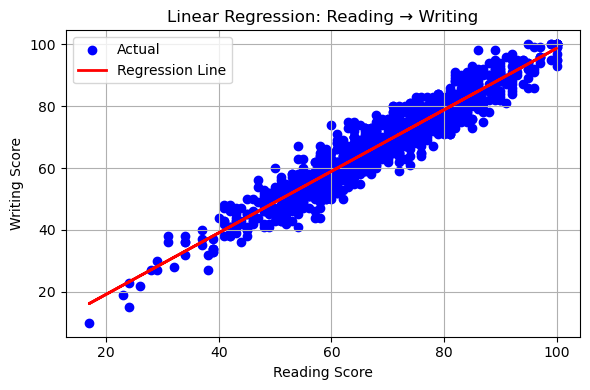

In [46]:
#Test 8: Linear Regression – a statistical and machine learning technique used to model the relationship between a 
#dependent (target) and one or more independent variables (predictors) by fitting a straight line through the data

# Use linear regression to predict a candidate's writing scores based on reading scores

#import library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Reshape X to 2D array for sklearn
X = df[['reading score']]
y = df['writing score']

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predict writing scores
y_pred = model.predict(X)

# Coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2:.4f}")

# Plot
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Linear Regression: Reading → Writing')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


From the result slope: 0.99 and intercept = -0.67, we can write the equation for the predictive model as :
Predicted Writing Score = −0.67+ 0.99 * Reading Score
Slope means: For every 1 point increase in reading score, the writing score increases by 0.99 points, on average. 
Slope ≈ 1	Strong, nearly perfect positive correlation
R-squared score  tells us that 90% of the variation in writing scores can be explained by the reading scores using this linear model.
That’s a very strong relationship, meaning the reading score is a very good predictor of writing performance.
What the regression plot shows:
Blue dots are tightly clustered around the red line, showing a strong linear relationship
The red line rises steadily, showing a Positive correlation
Very few extreme outliers shows that the Model likely generalizes well

Correlation Matrix:
               math score  reading score  writing score  total score
math score       1.000000       0.817580       0.802642     0.918746
reading score    0.817580       1.000000       0.954598     0.970331
writing score    0.802642       0.954598       1.000000     0.965667
total score      0.918746       0.970331       0.965667     1.000000


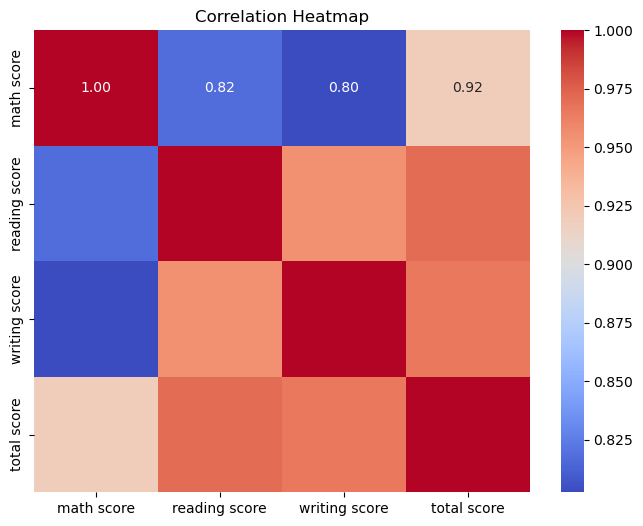

In [48]:
#Test 9: Correlation Analysis: This measures the strength and direction of the relationship between numeric or continous variables
#A statistical measure (Pearson’s r) shows how strongly two variables move together.

# Select numeric columns
numeric_df = df[['math score', 'reading score', 'writing score', 'total score']]

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Display
print("Correlation Matrix:")
print(correlation_matrix)

#imports library

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



The correlation matrix is made up of Pearson’s r values by default (when using .corr().
Pearson’s r is the most common correlation coefficient. It measures the linear relationship between two continuous variables.
Values range from -1 to +1:+1: Perfect positive linear relationship, 0: No linear relationship, –1: Perfect negative linear relationship
Since all the values shows high and positive R, the variables have a strong linear relationship. When one goes up, the other almost always goes up too (and vice versa)

In [50]:
# 10: A/B Testing: This is a form of hypothesis testing used to compare two groups (Group A vs Group B) 
#to see if there's a statistically significant difference in an outcome. 
# Example: A/B test to compare math scores between Males and Females using a two-sample T-test 

from scipy.stats import ttest_ind

# Separate the groups
male_scores = df[df['gender'] == 'male']['math score']
female_scores = df[df['gender'] == 'female']['math score']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(male_scores, female_scores, equal_var=False)  # Welch’s T-test

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Statistically significant difference in math scores between genders.")
else:
    print("No statistically significant difference in math scores between genders.")

T-statistic: 5.3980
P-value: 0.0000
Statistically significant difference in math scores between genders.


The result above shows that there is clear evidence that male and female students have different average math scores 
and this difference is not due to random chance."

In [52]:
#Test 11: Outliner Detection: This test is necessary to identify anomalies that may distort your analysis
#We will use the IQR (Interquartile Range) method, which is the most common based on the statistical method (percentiles)

Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['math score'] < lower_bound) | (df['math score'] > upper_bound)]
print("Outliers based on IQR:\n", outliers[['math score']])

Outliers based on IQR:
      math score
17           18
59            0
145          22
338          24
466          26
787          19
842          23
980           8


The result above shows the row indices and math scores that fall significantly below the expected range:
What Are Outliers?
Outliers are data points that deviate significantly from the rest of the dataset. They can:
1. Reveal data entry errors
2. Indicate exceptional cases
3. Skew your mean and standard deviation
4. Mislead your regression models and hypothesis tests

What Should a Data Analyst Do?
1. Investigate if you suspect data entry issues (e.g., score of 0)
2. Keep if the outliers are valid and represent real observations
3. Remove if there are anomalies that skew analysis or modeling
4. Flag	For robust modeling, flag or cap extreme values instead of dropping